In [1]:
with open('sample_data/train.jsonl', 'r') as f:
    train_data = f.readlines()

'{"messages": [{"role": "user", "content": [{"type": "image", "image": ""}, {"type": "text", "text": "What\'s in this image?"}]}, {"role": "assistant", "content": "<think>\\nThe image shows a dessert in a clear glass cup. Here is a step-by-step analysis of the visual characteristics and reasoning:\\n\\n1. **Visual Characteristics**:\\n   - **Color**: The dessert has a creamy, light beige color at the bottom, which is typical of a custard base. The top layer has a golden-brown, caramelized surface, which is characteristic of a caramelized sugar topping.\\n   - **Texture**: The bottom part appears smooth and creamy, indicating a custard-like consistency. The top layer has a slightly cracked, glossy texture, which is consistent with a caramelized sugar layer.\\n   - **Shape**: The dessert is presented in a cylindrical glass, which is a common serving style for creme br\\u00fbl\\u00e9e. The top is flat, and the caramelized layer is evenly distributed, except for the piece that appears to b
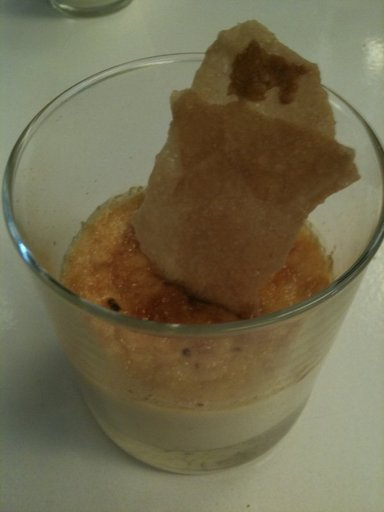

In [2]:
train_data[0]

In [13]:
import json
import base64
import os

# Create images directory if it doesn't exist
os.makedirs('sample_data/images', exist_ok=True)

output = []
for idx, line in enumerate(train_data):
    data = json.loads(line)
    
    # Loop through messages to find image content
    for message in data['messages']:
        for content in message['content']:
            if type(content) == str:
                continue

            if content.get('type') == 'image':
                # # Extract the base64 data after the comma
                # base64_data = content['image'].split(',')[1]
                # image_data = base64.b64decode(base64_data)
                
                # # Save image
                # with open(f'sample_data/images/{idx+1}.jpeg', 'wb') as f:
                #     f.write(image_data)
                content["type"] = "image"
                del content["image"]
                content["path"] = f"sample_data/images/{idx+1}.jpeg"
    output.append(data)
with open('sample_data/train_out.jsonl', 'w') as f:
    for data in output:
        f.write(json.dumps(data) + "\n")